### Simple Image Processing Techniques on Convection Cell Images

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg

In [2]:
from early_analysis import *

In [4]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/initial_convection_images"
os.chdir(source_dir)

Importing image:

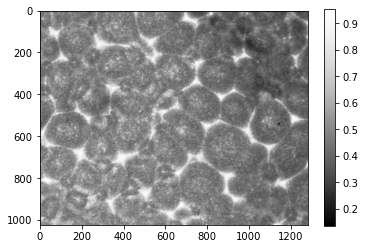

In [5]:
image = mpimg.imread('frame1.png')
image = image[...,0]
height, width = np.shape(image)
plt.imshow(image, cmap='Greys_r')
plt.colorbar();

In [6]:
np.shape(image)

(1024, 1280)

##### Looking at Intensity Distribution

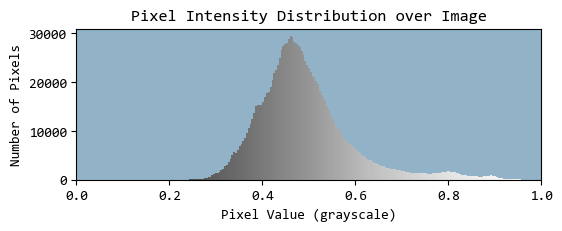

In [7]:
plotintensitydistribution(image)

##### Nearest Neighbor Difference Mapping

In [8]:
neighbor_difference_image = nearestneighborimage(image)
neighbor_difference_image = neighbor_difference_image/np.max(neighbor_difference_image)

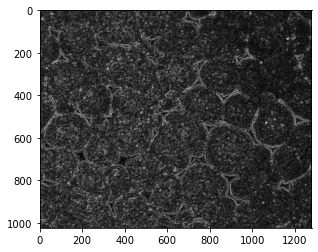

In [9]:
plt.imshow(neighbor_difference_image, cmap='Greys_r');

What is this image's distribution?

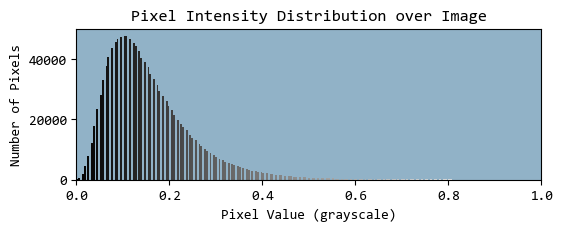

In [10]:
plotintensitydistribution(normalize(neighbor_difference_image))

##### Trying out some clipping:

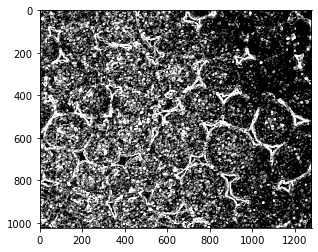

In [11]:
plt.imshow(neighbor_difference_image, cmap='Greys_r', clim=(0.1,0.3));

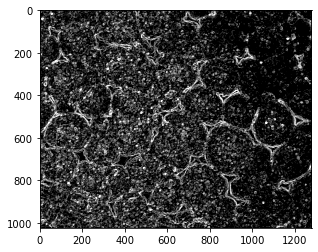

In [12]:
plt.imshow(neighbor_difference_image, cmap='Greys_r', clim=(0.1,0.5));

##### Next, I am going to try some filtering and convolution:

Sharpening w/ filter $\omega = \begin{bmatrix}0&-1&0\\-1&5&-1\\0&-1&0\end{bmatrix}$

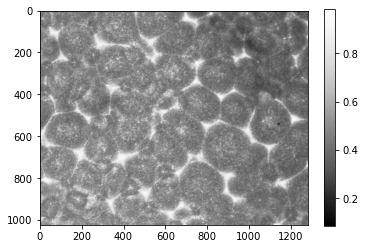

In [13]:
sharp_kernel = np.array(
    [[0, -1,  0],
    [-1,  5, -1], 
    [0, -1,  0]])
sharp_image = cv2.filter2D(src=image, ddepth=-1, kernel=sharp_kernel)
plt.imshow(sharp_image, cmap='Greys_r');
plt.colorbar()

Ridge Detection w/ filters such as $\omega = \begin{bmatrix}-1&-1&-1\\-1&8&-1\\-1&-1&-1\end{bmatrix}$

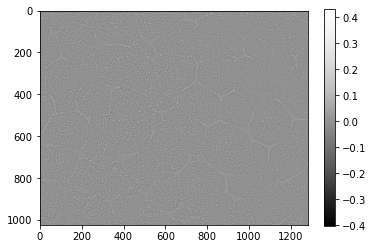

In [14]:
ridge_kernel_3 = np.array(
    [[-1, -1,  -1],
    [-1,  8, -1], 
    [-1, -1,  -1]])
ridge_image_3 = cv2.filter2D(src=image, ddepth=-1, kernel=ridge_kernel_3)
plt.imshow(ridge_image_3, cmap='Greys_r');
plt.colorbar()

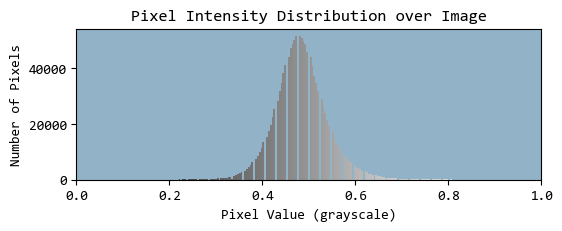

In [15]:
plotintensitydistribution(normalize(ridge_image_3))

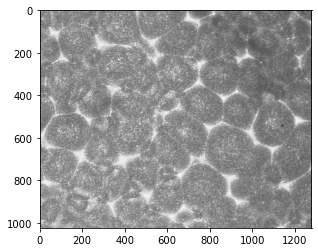

In [16]:
ridge_kernel_5 = np.array(
    [[-1, -1,  -1, -1, -1],
    [-1, 2, 2, 2, -1], 
    [-1, 2, 4, 2, -1],
    [-1, 2, 2, 2, -1],
    [-1, -1, -1, -1, -1]])
ridge_image_5 = cv2.filter2D(src=image, ddepth=-1, kernel=ridge_kernel_5)
plt.imshow(ridge_image_5, cmap='Greys_r');

*What if we could somehow learn the optimal filter??*

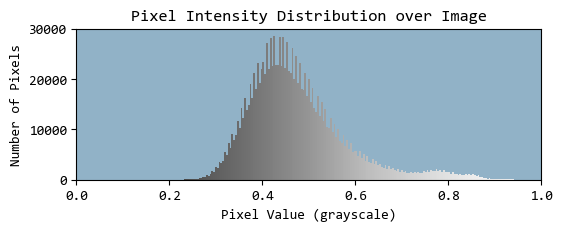

In [17]:
plotintensitydistribution(normalize(ridge_image_5))

##### Downsizing Image to try more complex filtering

In [18]:
image.shape

(1024, 1280)

In [19]:
half_size_image = cv2.resize(image, (int(width/2), int(height/2)), cv2.INTER_AREA)
quarter_size_image = cv2.resize(image, (int(width/4), int(height/4)), cv2.INTER_AREA)

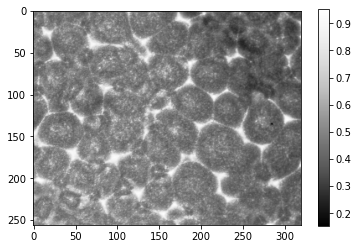

In [20]:
plt.imshow(quarter_size_image, cmap='Greys_r')
plt.colorbar();

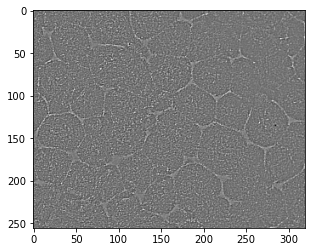

In [21]:
quarter_size_ridge_image_3 = cv2.filter2D(src=quarter_size_image, ddepth=-1, kernel=ridge_kernel_3)
plt.imshow(quarter_size_ridge_image_3, cmap='Greys_r');

#### An Assortment of "LBC" Images:

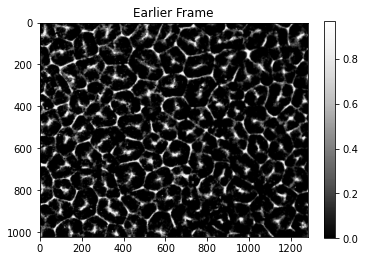

In [22]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LBC6mil0deg0_frames"
os.chdir(source_dir)
LBC6mil0deg0_frame19 = mpimg.imread('frame19.png')
LBC6mil0deg0_frame19 = LBC6mil0deg0_frame19[...,0]
plt.imshow(LBC6mil0deg0_frame19, cmap='Greys_r')
plt.title("Earlier Frame")
plt.colorbar();

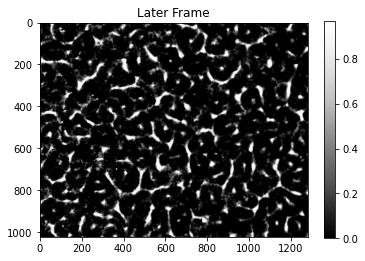

In [23]:
LBC6mil0deg0_frame114 = mpimg.imread('frame114.png')
LBC6mil0deg0_frame114 = LBC6mil0deg0_frame114[...,0]
plt.imshow(LBC6mil0deg0_frame114, cmap='Greys_r')
plt.title("Later Frame")
plt.colorbar();

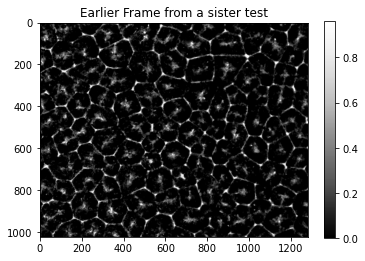

In [24]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LBC6mil0deg1_frames"
os.chdir(source_dir)
LBC6mil0deg1_frame1 = mpimg.imread('frame1.png')
LBC6mil0deg1_frame1 = LBC6mil0deg1_frame1[...,0]
plt.imshow(LBC6mil0deg1_frame1, cmap='Greys_r')
plt.title('Earlier Frame from a sister test')
plt.colorbar();

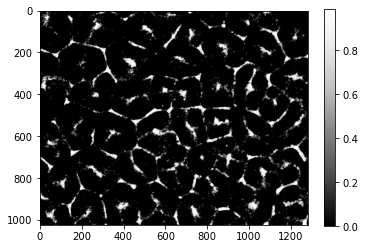

In [25]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LBC10mil0deg0_frames"
os.chdir(source_dir)
LBC10mil0deg0_frame57 = mpimg.imread('frame57.png')
LBC10mil0deg0_frame57 = LBC10mil0deg0_frame57[...,0]
plt.imshow(LBC10mil0deg0_frame57, cmap='Greys_r')
plt.colorbar();

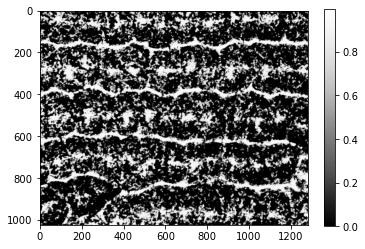

In [26]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LBC10mil90deg0_frames"
os.chdir(source_dir)
LBC10mil90deg0_frame1 = mpimg.imread('frame1.png')
LBC10mil90deg0_frame1 = LBC10mil90deg0_frame1[...,0]
plt.imshow(LBC10mil90deg0_frame1, cmap='Greys_r')
plt.colorbar();

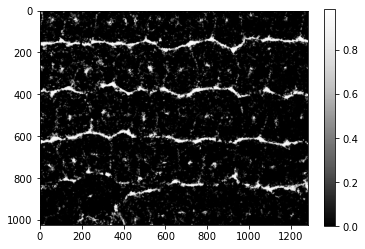

In [27]:
LBC10mil90deg0_frame76 = mpimg.imread('frame76.png')
LBC10mil90deg0_frame76 = LBC10mil90deg0_frame76[...,0]
plt.imshow(LBC10mil90deg0_frame76, cmap='Greys_r')
plt.colorbar();

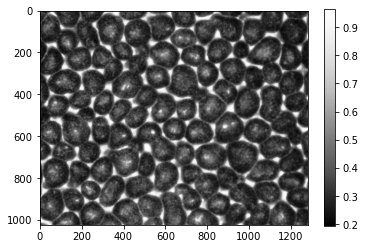

In [28]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LCB6mil90deg0_frames"
os.chdir(source_dir)
LCB6mil90deg0_frame1 = mpimg.imread('frame1.png')
LCB6mil90deg0_frame1 = LCB6mil90deg0_frame1[...,0]
plt.imshow(LCB6mil90deg0_frame1, cmap='Greys_r')
plt.colorbar();

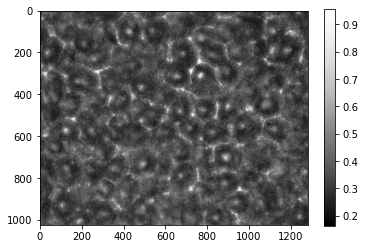

In [29]:
LCB6mil90deg0_frame95 = mpimg.imread('frame95.png')
LCB6mil90deg0_frame95 = LCB6mil90deg0_frame95[...,0]
plt.imshow(LCB6mil90deg0_frame95, cmap='Greys_r')
plt.colorbar();

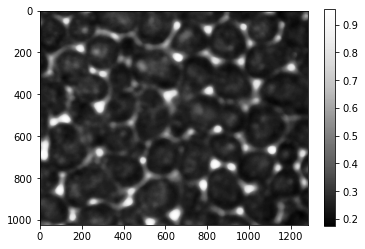

In [30]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LCBA10mil90deg0_frames"
os.chdir(source_dir)
LCBA10mil90deg0_frame19 = mpimg.imread('frame19.png')
LCBA10mil90deg0_frame19 = LCBA10mil90deg0_frame19[...,0]
plt.imshow(LCBA10mil90deg0_frame19, cmap='Greys_r')
plt.colorbar();

##### Conclusion from these images:
there is extreme variation between data points.  Making a dataset to train a model could be challenging.  But, the existence of many of video frames and data augmentaion are promising.

### Segmentation

#### Semantic (Panoptic) vs. Instance Segmentation:


<img src="segmentation_types_figure-01.png" width="800">

Green blob is classified as cell, vs. actually knowing individual cells

_note:_ our version of instance segmentation, when class is of no concern, can also be called "image partitioning"

**things to try**
 - dct
 - filtering with range of circle/oval sizes after decreasing resolution
 - segmentation; review the literature
 - Instance segmentation
 - image partitioning ()